  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

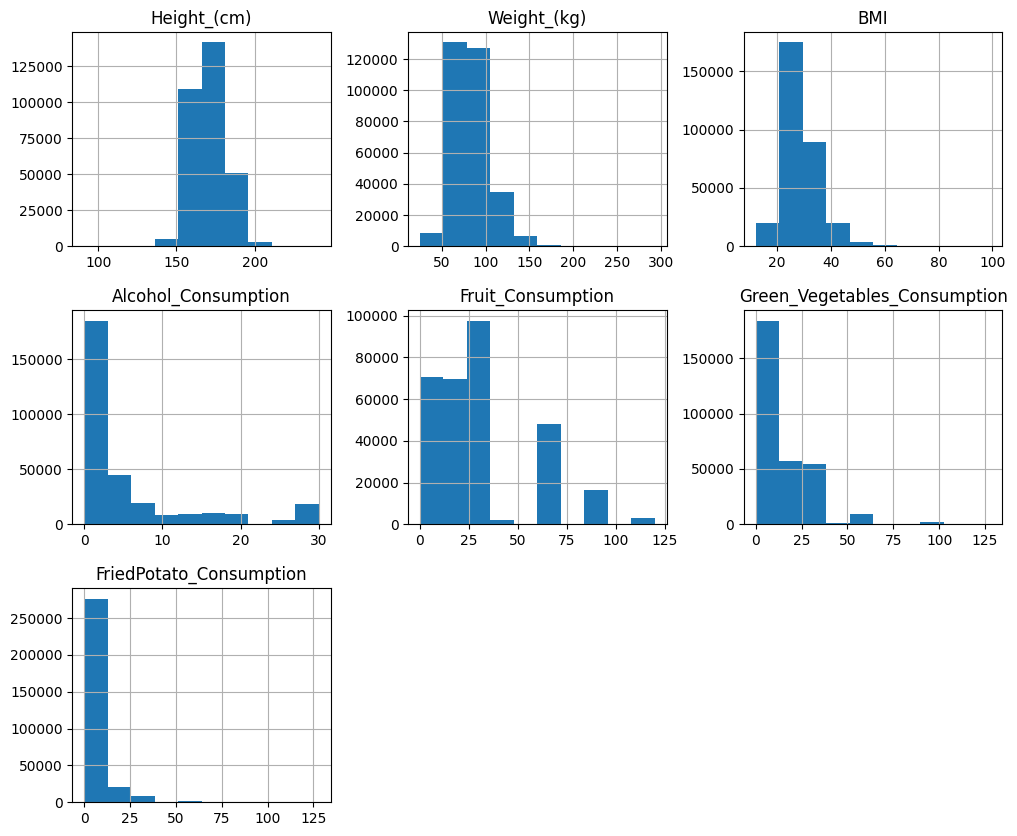

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')
  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           N

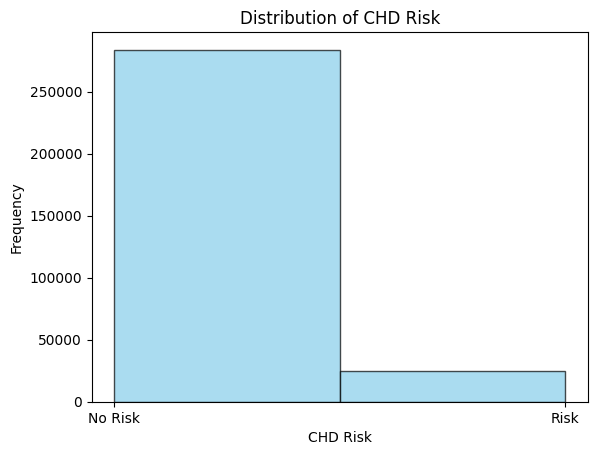

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('CVD_cleaned.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Get a summary of the DataFrame including data types and missing values
print(df.info())

# Get summary statistics of numerical columns
print(df.describe())

# Plot histograms for numerical features
df.hist(figsize=(12, 10))
plt.show()

print(df.columns)

print(df.head())

# Define categorical columns
categorical_cols = ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
                    'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

# Create a label encoder object
label_encoder = LabelEncoder()

# Iterate through each categorical column and encode
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Check the first few rows of the DataFrame to confirm encoding
print(df.head())

# Define features (X) and target variable (y)
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Define new data for prediction (example)
new_data = pd.DataFrame({
    'General_Health': ['Poor', 'Very Good', 'Good'],
    'Checkup': ['Within the past 2 years', 'Within the past year', 'Within the past year'],
    'Exercise': ['No', 'No', 'Yes'],
    'Heart_Disease': ['No', 'Yes', 'No'],  # Including Heart_Disease column
    'Skin_Cancer': ['No', 'No', 'No'],
    'Other_Cancer': ['No', 'No', 'No'],
    'Depression': ['No', 'No', 'No'],
    'Diabetes': ['No', 'Yes', 'Yes'],
    'Arthritis': ['Yes', 'No', 'No'],
    'Sex': ['Female', 'Female', 'Male'],
    'Age_Category': ['70-74', '70-74', '60-64'],
    'Height_(cm)': [150.0, 165.0, 163.0],
    'Weight_(kg)': [32.66, 77.11, 88.45],
    'BMI': [14.54, 28.29, 33.47],
    'Smoking_History': ['Yes', 'No', 'No'],
    'Alcohol_Consumption': [0.0, 0.0, 4.0],
    'Fruit_Consumption': [30.0, 30.0, 12.0],
    'Green_Vegetables_Consumption': [16.0, 0.0, 3.0],
    'FriedPotato_Consumption': [12.0, 4.0, 16.0]
})

# Create a copy of the new data to avoid modifying the original DataFrame
new_data_encoded = new_data.copy()

# Encode categorical variables
for col in categorical_cols:
    new_data_encoded[col] = label_encoder.fit_transform(new_data[col])

# Ensure all numerical features are represented as floats
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption',
                  'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
for col in numerical_cols:
    new_data_encoded[col] = new_data_encoded[col].astype(float)

# Remove 'Heart_Disease' column from the new data
new_data_encoded.drop(columns=['Heart_Disease'], inplace=True)

# Make predictions on the modified new data using the trained logistic regression model
new_probabilities = model.predict_proba(new_data_encoded)[:, 1]

# Print predicted probabilities for CHD risk
# Set the threshold for classification
threshold = 0.5

# Convert probabilities into binary predictions based on the threshold
new_predictions = (new_probabilities >= threshold).astype(int)

# Print binary predictions for CHD risk
print("Binary Predictions for CHD Risk:")
print(new_predictions)

# Visualize CHD risk distribution
plt.hist(df['Heart_Disease'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('CHD Risk')
plt.ylabel('Frequency')
plt.title('Distribution of CHD Risk')
plt.xticks([0, 1], ['No Risk', 'Risk'])
plt.show()
